In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Загружаем датасет

In [28]:
from datasets import load_dataset

data = load_dataset("adarshzolekar/foods-nutrition-dataset")

In [29]:
data

DatasetDict({
    train: Dataset({
        features: ['Food Items', 'Energy kcal', 'Carbs', 'Protein(g)', 'Fat(g)', 'Freesugar(g)', 'Fibre(g)', 'Cholestrol(mg)', 'Calcium(mg)'],
        num_rows: 1028
    })
})

In [30]:
df = data['train'].to_pandas()
df

,Food Items,Energy kcal,Carbs,Protein(g),Fat(g),Freesugar(g),Fibre(g),Cholestrol(mg),Calcium(mg)
0,Butternaan,300.00,50.00,7.00,10.00,2.00,2.00,15.0,50.00
1,Cupcake,200.00,30.00,2.00,8.00,20.00,0.50,20.0,20.00
2,Donuts,250.00,30.00,3.00,12.00,10.00,1.00,20.0,20.00
3,French Fries,312.00,41.00,3.40,15.00,0.30,3.80,0.0,20.00
4,Garlic Bread,200.00,25.00,4.00,10.00,1.00,1.00,10.0,30.00
...,...,...,...,...,...,...,...,...,...
1023,Sweet and sour tomato pickle (Khatta meetha ta...,60.88,6.55,1.26,3.24,4.31,2.20,0.0,15.18
1024,Jhatpat achar with carrot (Jhatpat achaar gaja...,91.21,6.32,1.98,6.55,3.04,5.08,0.0,54.31
1025,Tomato chutney (Tamatar ki chutney),176.07,31.85,0.97,6.01,30.02,1.49,0.0,25.34
1026,Tomato ketchup,33.07,6.48,0.91,0.30,4.68,1.90,0.0,15.33


In [31]:
df.isna().sum()

Food Items        0
Energy kcal       0
Carbs             0
Protein(g)        0
Fat(g)            0
Freesugar(g)      0
Fibre(g)          0
Cholestrol(mg)    0
Calcium(mg)       0
dtype: int64

Пропусков нет

# Очищаем выбросы (Практическая часть)

## Квантильный метод

In [32]:
def clear_column_quantile(col, data):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"Q1 (25-й перцентиль): {Q1}")
    print(f"Q3 (75-й перцентиль): {Q3}")
    print(f"IQR: {IQR}")
    print(f"Нижняя граница: {lower_bound}")
    print(f"Верхняя граница: {upper_bound}")

    outliers_iqr = data[(data[col] < lower_bound) | (data[col] > upper_bound)]

    print(f"\nКоличество выбросов по методу IQR: {len(outliers_iqr)}")

    data_copy = data.copy()
    data_copy[col] = data_copy[col]

    data_copy.loc[data_copy[col] > upper_bound, col] = upper_bound
    data_copy.loc[data_copy[col] < lower_bound, col] = lower_bound

    return data_copy

In [33]:
df_quantile = df.copy()

In [34]:
for col in ['Energy kcal', 'Carbs', 'Protein(g)', 'Fat(g)',
       'Freesugar(g)', 'Fibre(g)', 'Cholestrol(mg)', 'Calcium(mg)']: 
    print(f'\n=== Обработка колонки {col} ===')
    df_quantile = clear_column_quantile(col, df_quantile)


=== Обработка колонки Energy kcal ===
Q1 (25-й перцентиль): 101.84
Q3 (75-й перцентиль): 312.91249999999997
IQR: 211.07249999999996
Нижняя граница: -214.76874999999993
Верхняя граница: 629.5212499999999

Количество выбросов по методу IQR: 69

=== Обработка колонки Carbs ===
Q1 (25-й перцентиль): 5.6325
Q3 (75-й перцентиль): 27.439999999999998
IQR: 21.807499999999997
Нижняя граница: -27.078749999999992
Верхняя граница: 60.15124999999999

Количество выбросов по методу IQR: 29

=== Обработка колонки Protein(g) ===
Q1 (25-й перцентиль): 2.1
Q3 (75-й перцентиль): 6.645
IQR: 4.545
Нижняя граница: -4.717499999999999
Верхняя граница: 13.462499999999999

Количество выбросов по методу IQR: 19

=== Обработка колонки Fat(g) ===
Q1 (25-й перцентиль): 4.047499999999999
Q3 (75-й перцентиль): 17.075
IQR: 13.0275
Нижняя граница: -15.493749999999999
Верхняя граница: 36.616249999999994

Количество выбросов по методу IQR: 129

=== Обработка колонки Freesugar(g) ===
Q1 (25-й перцентиль): 1.16
Q3 (75-й пер

## Z метод

In [35]:
Z_THRESHOLD = 1.5

In [36]:
def clear_column_z_method(col, data):
    data_copy = data.copy()

    data_copy['Z_Score'] = np.abs(stats.zscore(data_copy[col]))

    outliers_z = data_copy[data_copy['Z_Score'] > Z_THRESHOLD]

    print(f"Количество выбросов по методу Z-Score (порог = {Z_THRESHOLD}): {len(outliers_z)}")
    print("Выбросы:")
    print(outliers_z[[col, 'Z_Score']])

    return data_copy[data_copy['Z_Score'] <= Z_THRESHOLD]

In [37]:
df_z_method = df.copy()

In [38]:
for col in ['Energy kcal', 'Carbs', 'Protein(g)', 'Fat(g)',
       'Freesugar(g)', 'Fibre(g)', 'Cholestrol(mg)', 'Calcium(mg)']: 
    print(f'\n=== Обработка колонки {col} ===')
    df_z_method = clear_column_z_method(col, df_z_method)


=== Обработка колонки Energy kcal ===
Количество выбросов по методу Z-Score (порог = 1.5): 106
Выбросы:
      Energy kcal   Z_Score
110        737.63  2.698440
111        684.25  2.412206
112        710.02  2.550389
113        785.16  2.953305
114        776.74  2.908155
...           ...       ...
939        708.96  2.544705
957        774.86  2.898074
1008       610.93  2.019049
1014       736.81  2.694043
1016       552.59  1.706219

[106 rows x 2 columns]

=== Обработка колонки Carbs ===
Количество выбросов по методу Z-Score (порог = 1.5): 99
Выбросы:
      Carbs   Z_Score
0     50.00  1.770849
130   65.08  2.653267
142   51.75  1.873251
318   46.86  1.587109
329   46.59  1.571310
...     ...       ...
993   45.60  1.513379
995   50.38  1.793085
1000  49.94  1.767338
1017  67.95  2.821208
1020  55.51  2.093271

[99 rows x 2 columns]

=== Обработка колонки Protein(g) ===
Количество выбросов по методу Z-Score (порог = 1.5): 72
Выбросы:
      Protein(g)   Z_Score
5          12.00  1.

## Визуализация

In [39]:
def print_boxplot(col, data, df_cleaned1, df_cleaned2):
    plt.figure(figsize=(20, 60))

    plt.subplot(8, 3, 1)

    plt.boxplot(data[col])
    plt.title(f'Boxplot до обработки ({col})')

    plt.subplot(8, 3, 2)

    plt.boxplot(df_cleaned1[col])
    plt.title(f'Boxplot после обработки методом квартильного размаха ({col})')

    plt.subplot(8, 3, 3)

    plt.boxplot(df_cleaned2[col])
    plt.title(f'Boxplot после обработки Z методом ({col})')

    plt.tight_layout()
    plt.show()


=== Обработка колонки Energy kcal ===


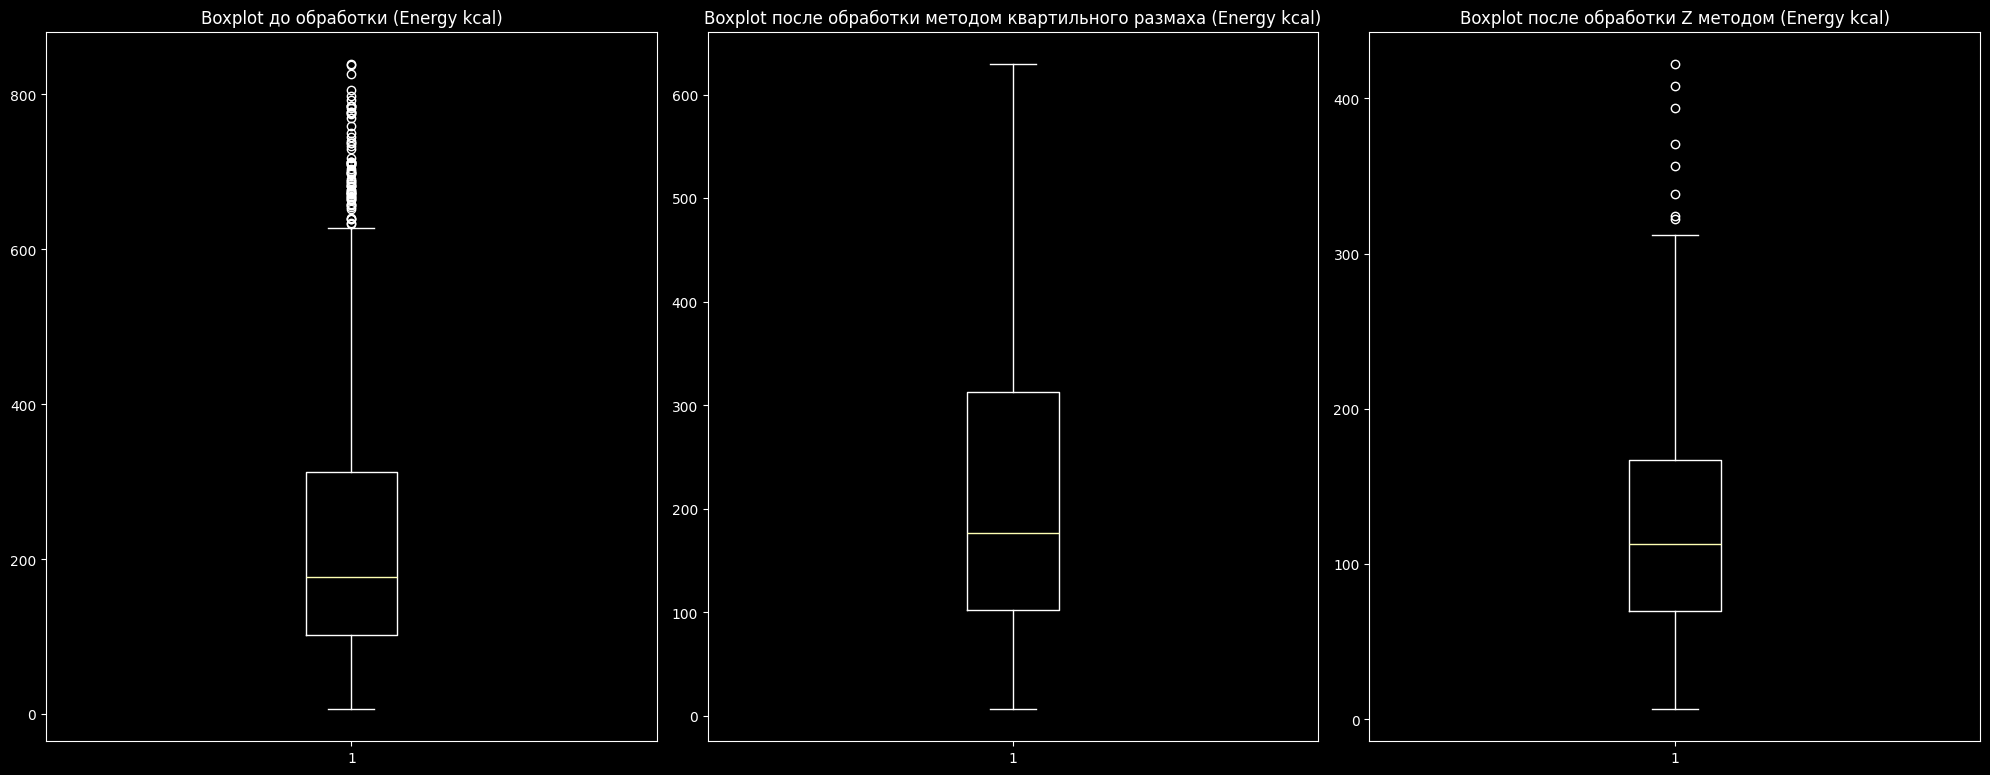


=== Обработка колонки Carbs ===


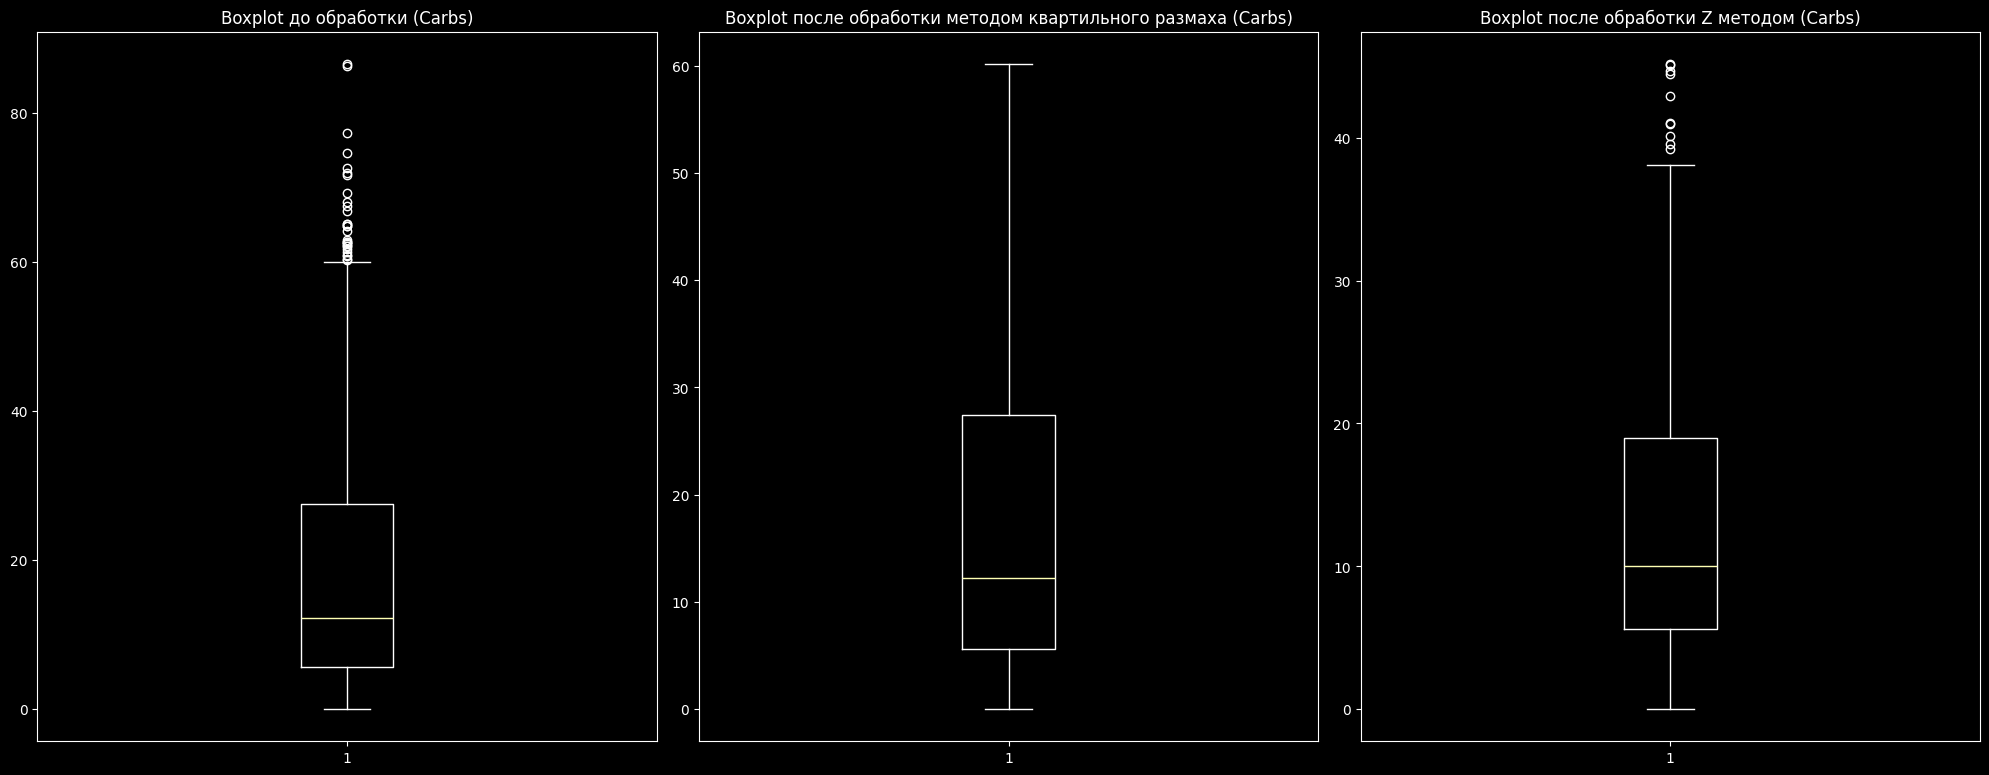


=== Обработка колонки Protein(g) ===


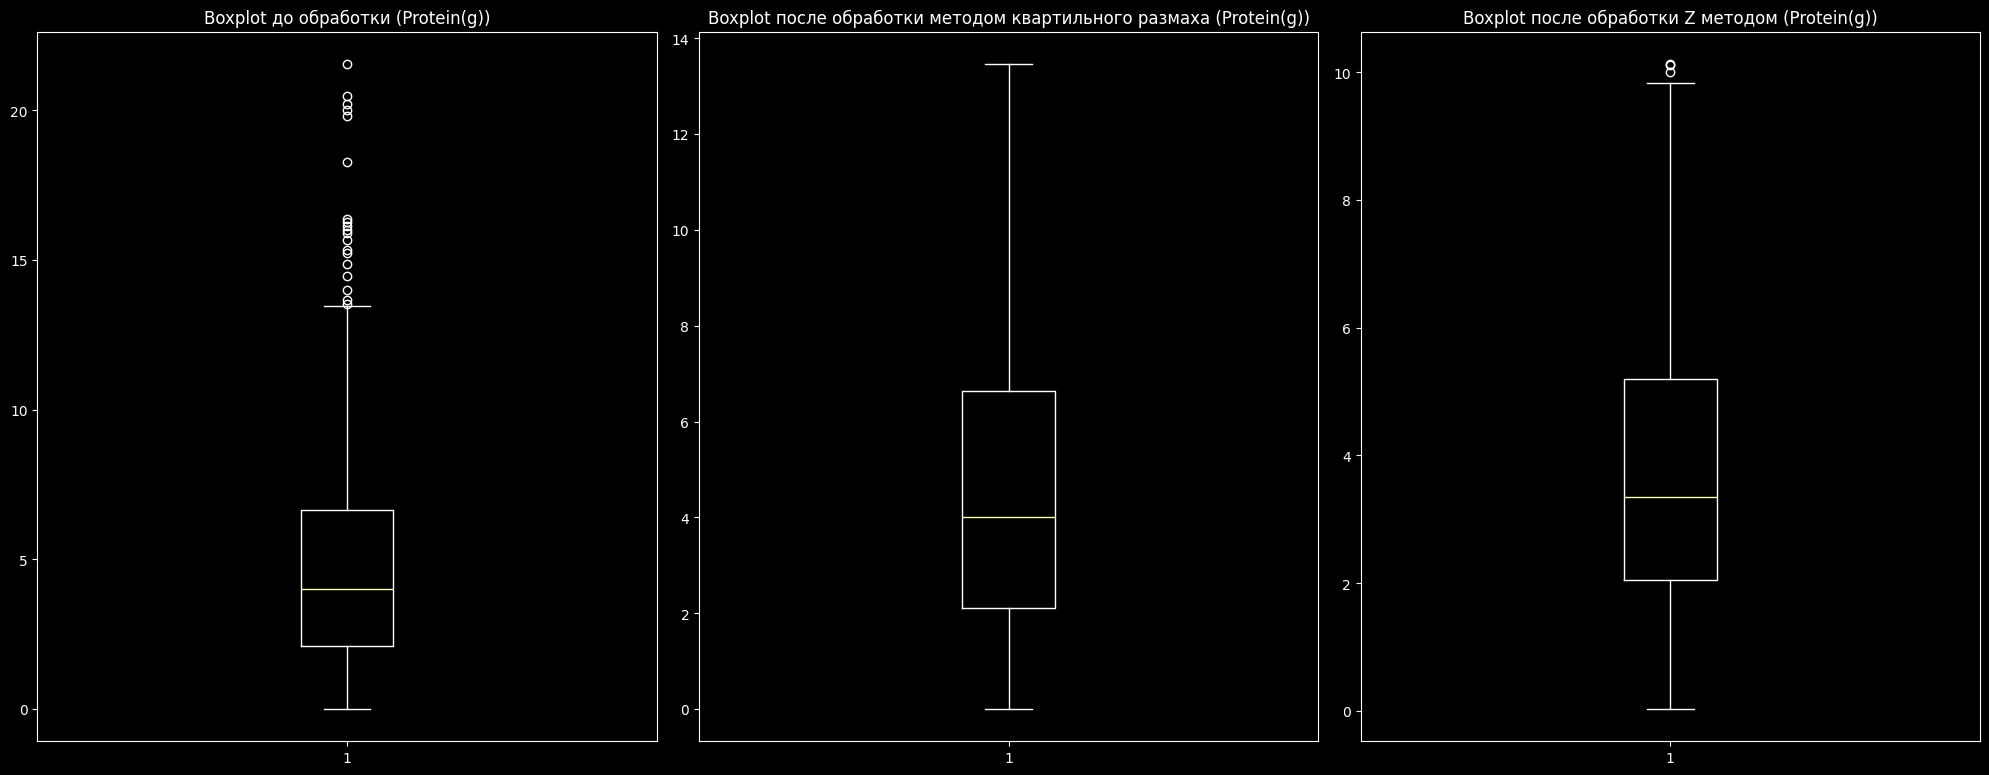


=== Обработка колонки Fat(g) ===


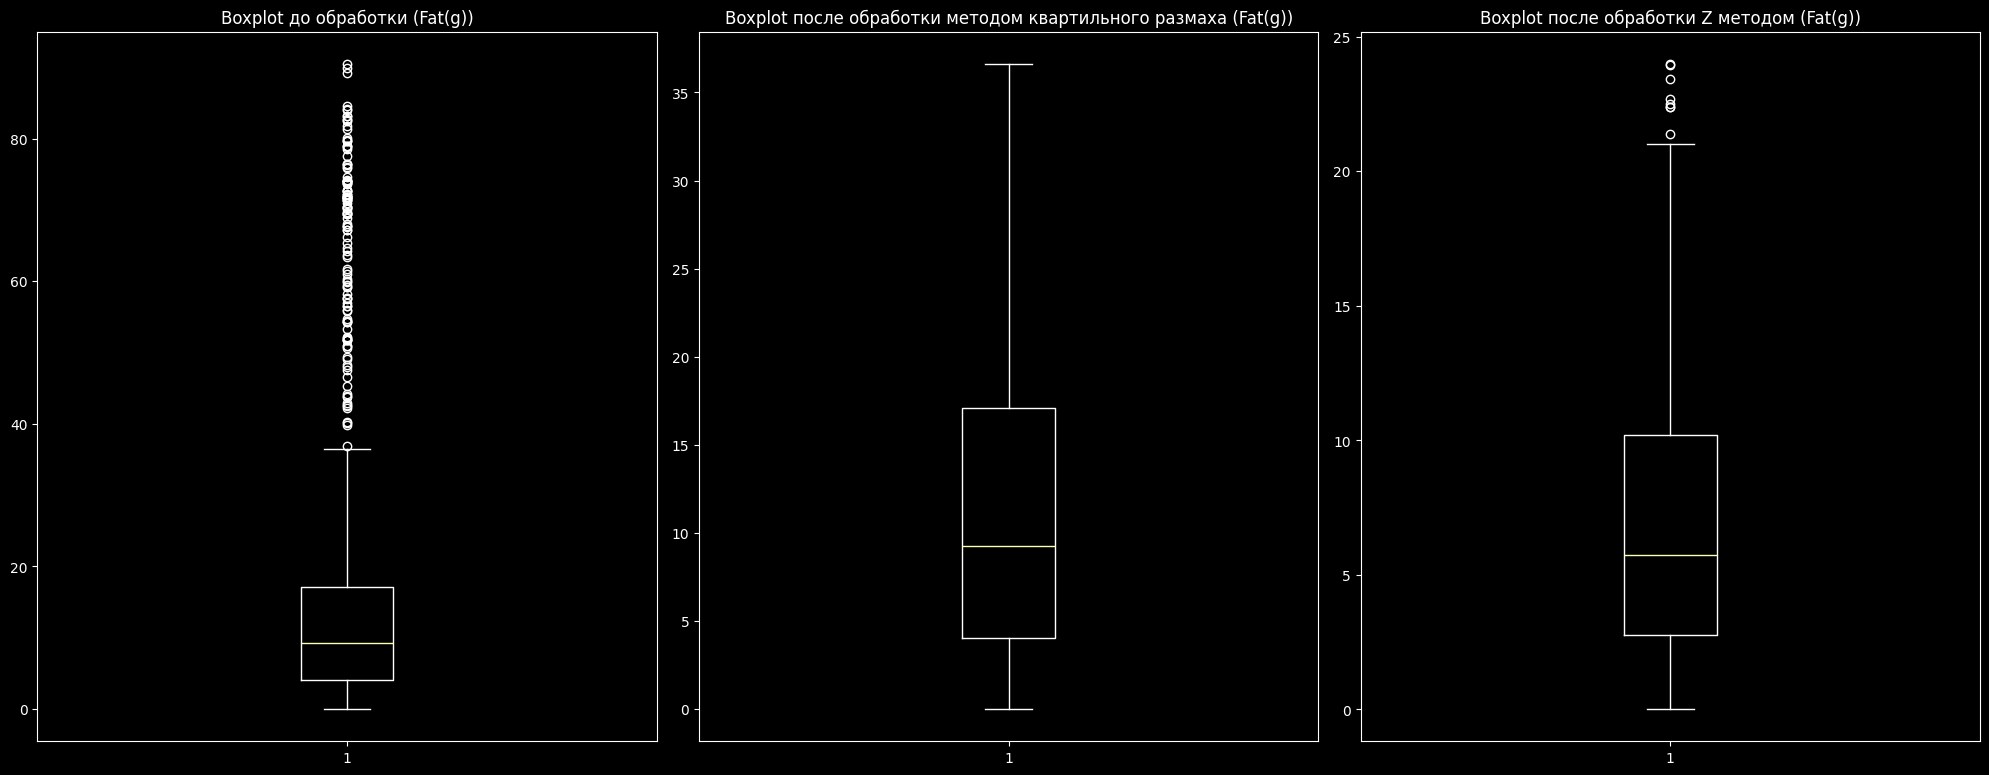


=== Обработка колонки Freesugar(g) ===


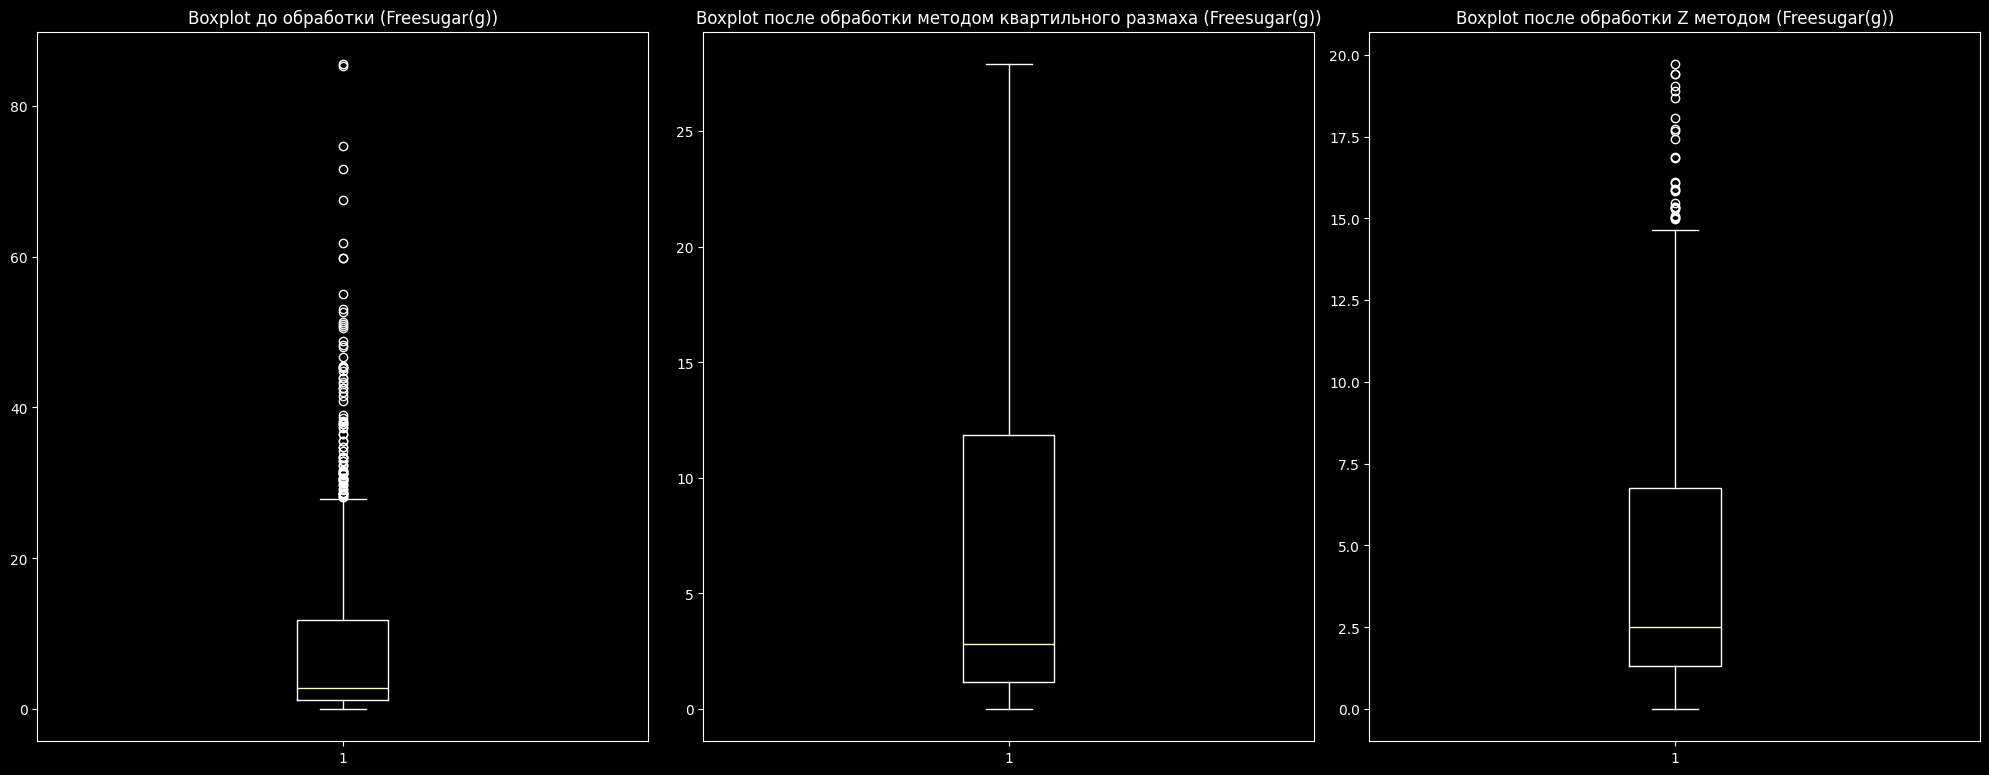


=== Обработка колонки Fibre(g) ===


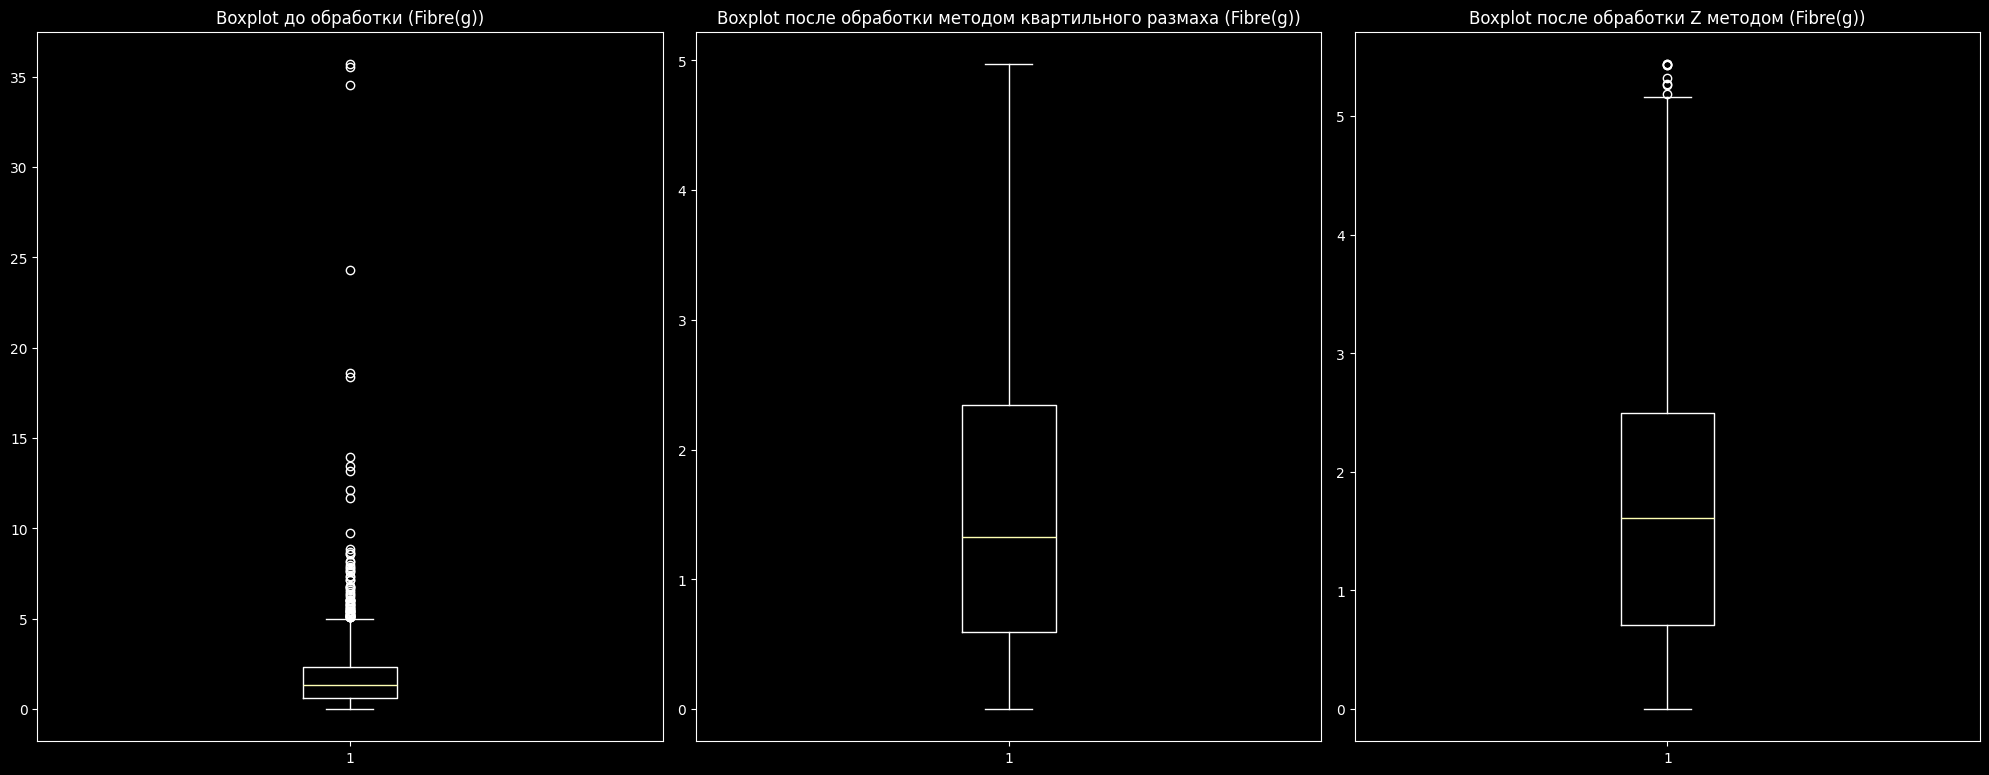


=== Обработка колонки Cholestrol(mg) ===


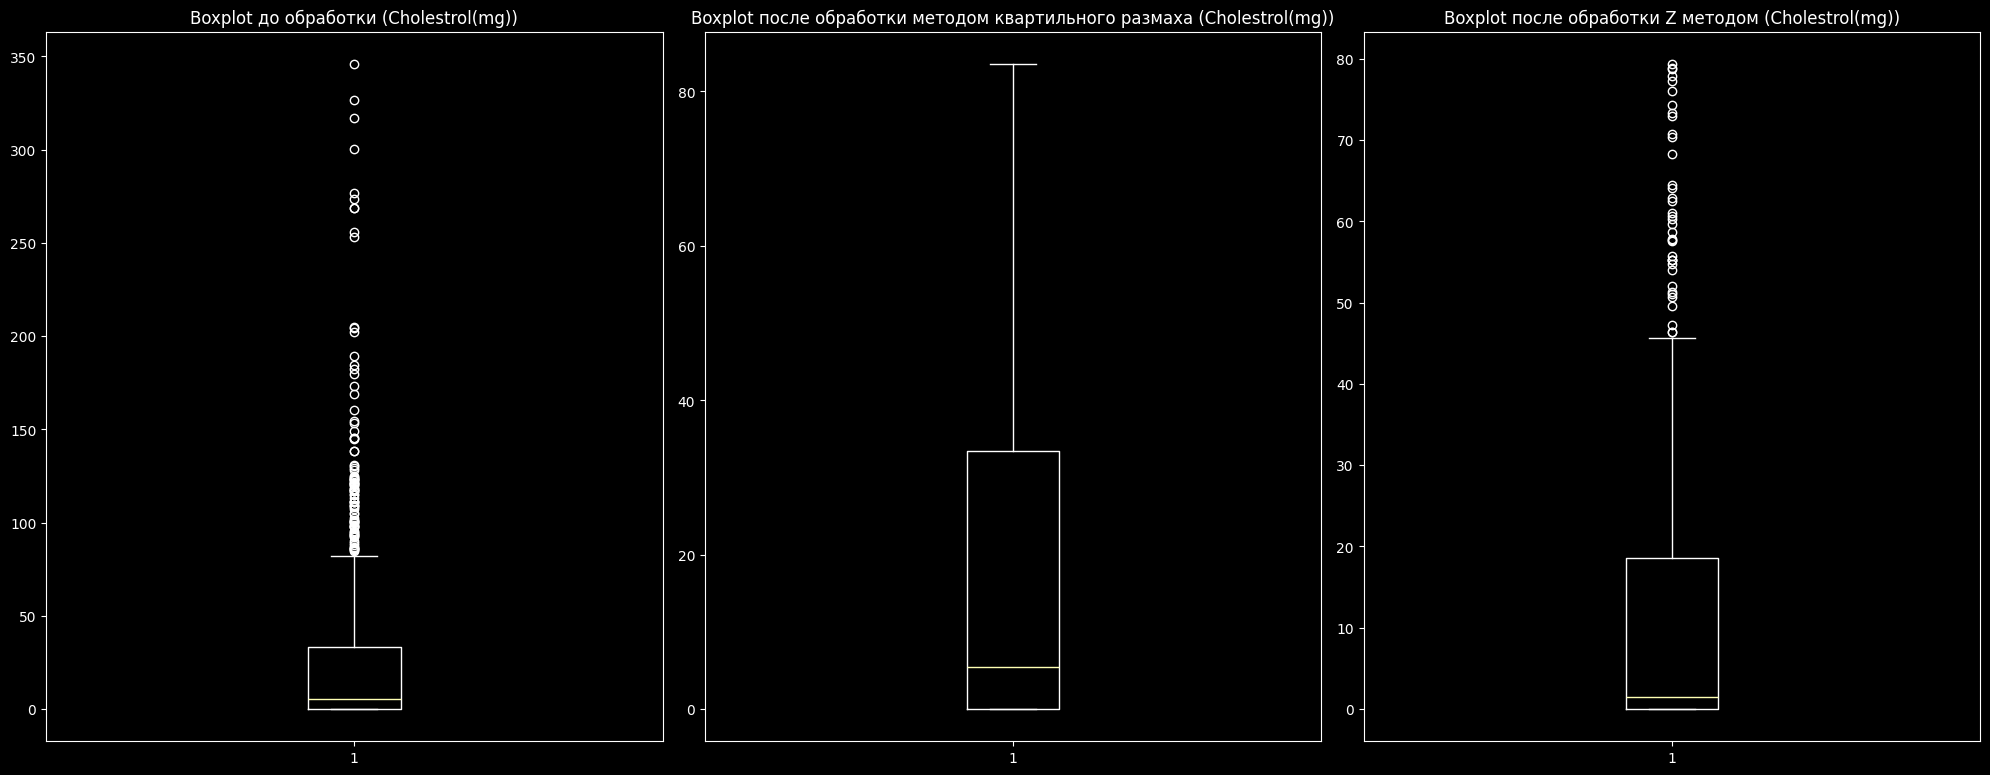


=== Обработка колонки Calcium(mg) ===


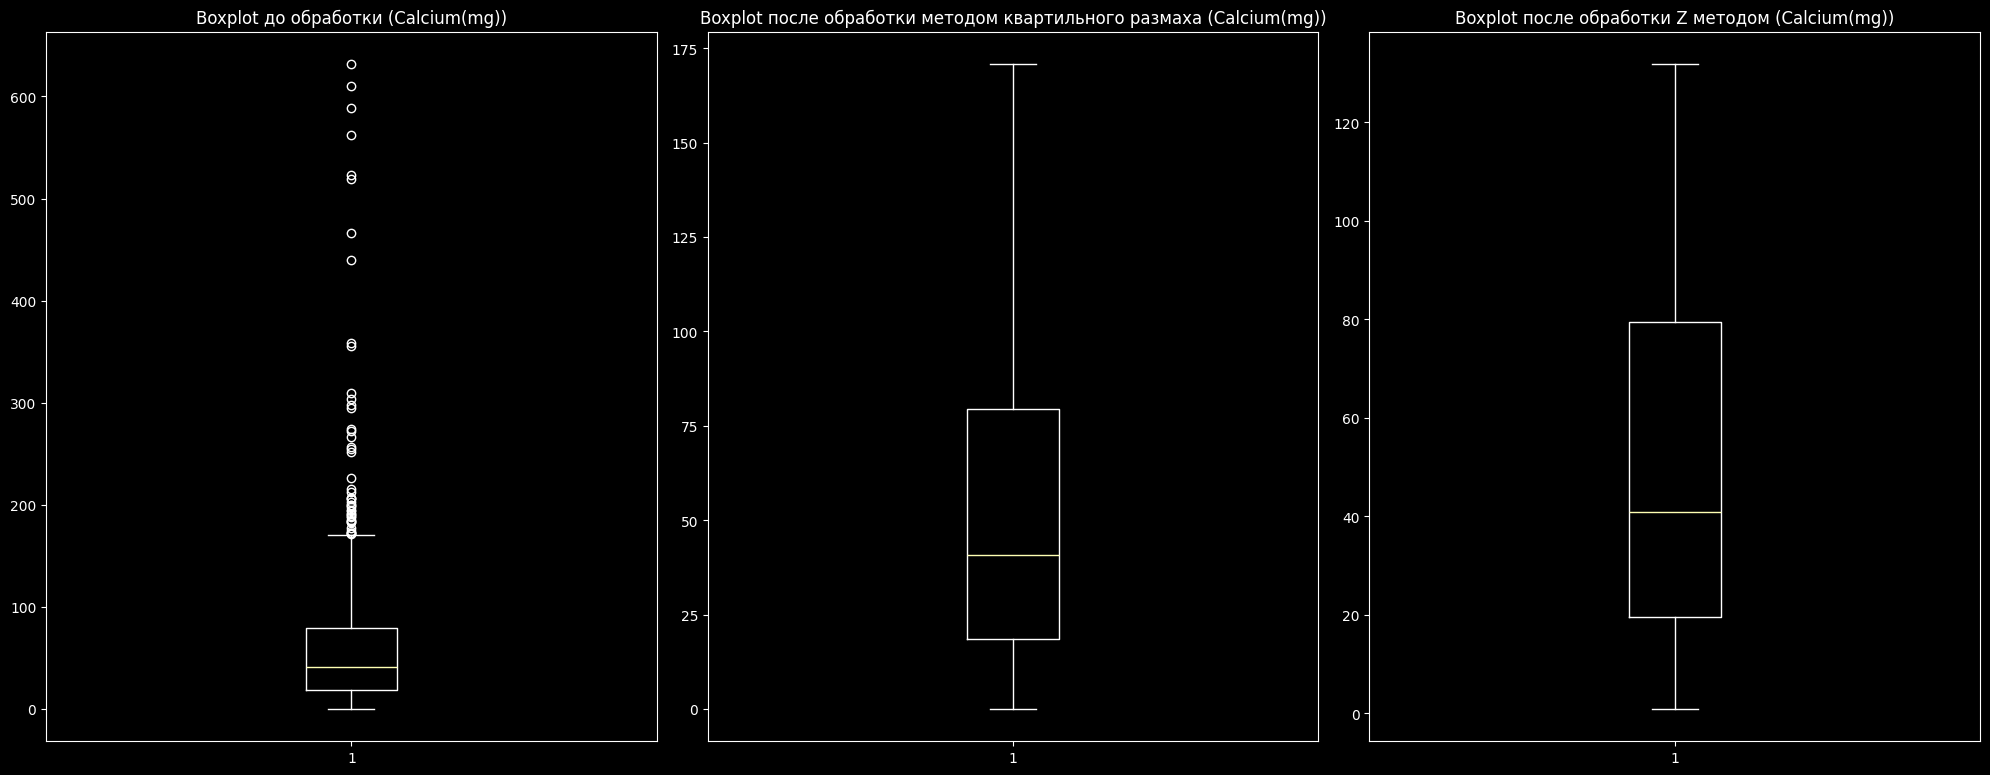

In [40]:
for col in ['Energy kcal', 'Carbs', 'Protein(g)', 'Fat(g)',
       'Freesugar(g)', 'Fibre(g)', 'Cholestrol(mg)', 'Calcium(mg)']: 
    print(f'\n=== Обработка колонки {col} ===')
    print_boxplot(col, df, df_quantile, df_z_method)

# Отбор признаков (Лекционная часть)

## Первичная обработка

Предположим, что целевой столбец - Energy kcal

In [41]:
df_quantile.describe()

,Energy kcal,Carbs,Protein(g),Fat(g),Freesugar(g),Fibre(g),Cholestrol(mg),Calcium(mg)
count,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000
mean,228.908440,18.350444,4.723850,12.637866,7.788633,1.705196,20.653414,55.051882
std,172.645766,16.171384,3.278114,11.383539,9.267517,1.443844,28.155533,45.920799
min,6.610000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,101.840000,5.632500,2.100000,4.047500,1.160000,0.590000,0.000000,18.595000
50%,176.870000,12.250000,4.000000,9.270000,2.830000,1.325000,5.410000,40.795000
75%,312.912500,27.440000,6.645000,17.075000,11.857500,2.342500,33.422500,79.500000
max,629.521250,60.151250,13.462500,36.616250,27.903750,4.971250,83.556250,170.857500


Данные без пропусков, имеют достаточно большое отклонение (не константны)

In [42]:
num_columns = ['Energy kcal', 'Carbs', 'Protein(g)', 'Fat(g)',
       'Freesugar(g)', 'Fibre(g)', 'Cholestrol(mg)', 'Calcium(mg)']

In [43]:
target = 'Energy kcal'

Посмотрим на корреляцию между признаками

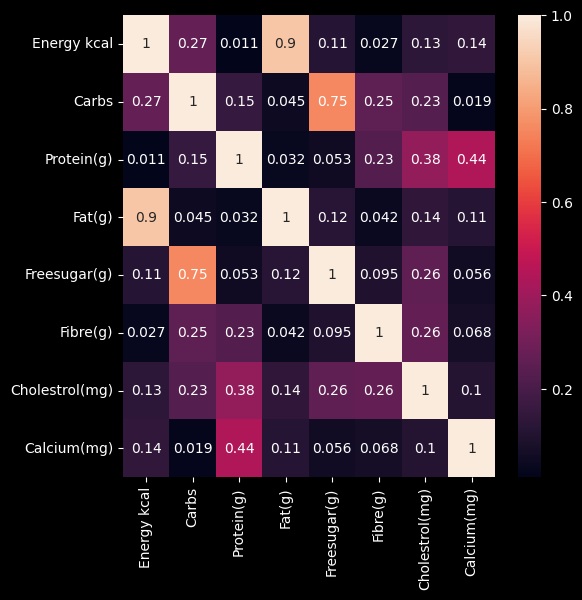

In [44]:
plt.figure(figsize=(6, 6))
sns.heatmap(np.abs(df_quantile[num_columns].corr()), annot=True)
plt.show()

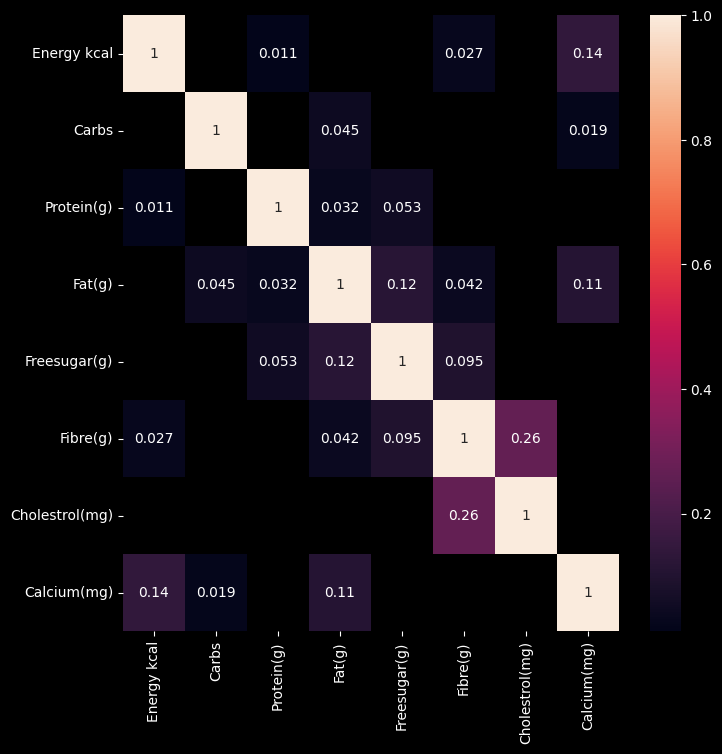

In [45]:
plt.figure(figsize=(8, 8))
sns.heatmap(np.abs(df_quantile[num_columns].corr()[((df_quantile[num_columns].corr() < 0.05) 
                                                    | (df_quantile[num_columns].corr() > 0.95))]), annot=True)
plt.show()

Видим, что признаки Protein(g) и Fibre(g) имеют довольно низкую корреляцию с целевой переменной

При острой необходимости понижения размерности можно удалить, но, так как в нашем случае признаков не много, оставим

## Отбор жадным алгоритмом

In [46]:
SEED = 42

In [47]:
# Разделение на признаки и целевую переменную
X = df_quantile[['Carbs', 'Protein(g)', 'Fat(g)', 'Freesugar(g)', 'Fibre(g)', 
                 'Cholestrol(mg)', 'Calcium(mg)']]
y = df_quantile['Energy kcal']

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [49]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [50]:
# Масштабирование признаков
scaler = StandardScaler()

train_index = X_train.index
test_index = X_test.index
feature_columns = X_train.columns

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=feature_columns, index=train_index)
X_test = pd.DataFrame(X_test, columns=feature_columns, index=test_index)

In [51]:
# Метод создания и обучения модели
def process(X_train, X_test, y_train, y_test):
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)

    # Предсказание на тестовой выборке
    y_pred = lr_model.predict(X_test)

    # Оценка качества модели
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"MAE: {mae:.2f}")
    print(f"R2 Score: {r2:.4f}")

    return lr_model, mae, r2

In [52]:
available_features = list(X_train.columns)
selected_features = []
best_score = -np.inf
history = []

while available_features:
    scores = []
    
    # Пробуем добавить каждый доступный признак
    for feature in available_features:
        current_features = selected_features + [feature]
        
        # Обучаем модель с текущим набором признаков
        X_train_subset = X_train[current_features]
        X_test_subset = X_test[current_features]
        
        lr_model = LinearRegression()
        lr_model.fit(X_train_subset, y_train)
        y_pred = lr_model.predict(X_test_subset)
        
        score = r2_score(y_test, y_pred)
        
        scores.append((feature, score))
        
        print(f"Признаки {current_features}: R2 = {abs(score):.4f}")
    
    best_feature, best_current_score = max(scores, key=lambda x: x[1])
    
    # Проверяем, улучшилась ли метрика достаточно сильно
    delta = 0.001 # минимальное значимое улучшение
    if (best_current_score > best_score) and (best_current_score - best_score > delta):
        
        best_score = best_current_score
        selected_features.append(best_feature)
        available_features.remove(best_feature)
        
        history.append({
            'added_feature': best_feature,
            'features': selected_features.copy(),
            'score': abs(best_current_score)
        })
        
        print(f"\nДобавлен признак: {best_feature}")
        print(f"Текущий набор: {selected_features}")
        print(f"Лучший R2: {best_current_score:.4f}\n")
        
    else:
        print(f"\nНет улучшения")
        print(f"Отобраные признаки: {selected_features}")
        break

Признаки ['Carbs']: R2 = 0.0877
Признаки ['Protein(g)']: R2 = 0.0002
Признаки ['Fat(g)']: R2 = 0.8337
Признаки ['Freesugar(g)']: R2 = 0.0103
Признаки ['Fibre(g)']: R2 = 0.0017
Признаки ['Cholestrol(mg)']: R2 = 0.0108
Признаки ['Calcium(mg)']: R2 = 0.0337

Добавлен признак: Fat(g)
Текущий набор: ['Fat(g)']
Лучший R2: 0.8337

Признаки ['Fat(g)', 'Carbs']: R2 = 0.9155
Признаки ['Fat(g)', 'Protein(g)']: R2 = 0.8344
Признаки ['Fat(g)', 'Freesugar(g)']: R2 = 0.8792
Признаки ['Fat(g)', 'Fibre(g)']: R2 = 0.8381
Признаки ['Fat(g)', 'Cholestrol(mg)']: R2 = 0.8330
Признаки ['Fat(g)', 'Calcium(mg)']: R2 = 0.8326

Добавлен признак: Carbs
Текущий набор: ['Fat(g)', 'Carbs']
Лучший R2: 0.9155

Признаки ['Fat(g)', 'Carbs', 'Protein(g)']: R2 = 0.9223
Признаки ['Fat(g)', 'Carbs', 'Freesugar(g)']: R2 = 0.9149
Признаки ['Fat(g)', 'Carbs', 'Fibre(g)']: R2 = 0.9159
Признаки ['Fat(g)', 'Carbs', 'Cholestrol(mg)']: R2 = 0.9224
Признаки ['Fat(g)', 'Carbs', 'Calcium(mg)']: R2 = 0.9161

Добавлен признак: Cholestro